In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:

%cd /content
!unzip /content/drive/'My Drive'/'Colab Notebooks'/data.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: data/Train/5/00005_00017_00003.png  
  inflating: data/Train/5/00005_00017_00007.png  
  inflating: data/Train/5/00005_00017_00008.png  
  inflating: data/Train/5/00005_00017_00013.png  
  inflating: data/Train/5/00005_00017_00016.png  
  inflating: data/Train/5/00005_00017_00019.png  
  inflating: data/Train/5/00005_00017_00025.png  
  inflating: data/Train/5/00005_00017_00027.png  
  inflating: data/Train/5/00005_00017_00028.png  
  inflating: data/Train/5/00005_00017_00029.png  
  inflating: data/Train/5/00005_00018_00000.png  
  inflating: data/Train/5/00005_00018_00001.png  
  inflating: data/Train/5/00005_00018_00004.png  
  inflating: data/Train/5/00005_00018_00009.png  
  inflating: data/Train/5/00005_00018_00010.png  
  inflating: data/Train/5/00005_00018_00011.png  
  inflating: data/Train/5/00005_00018_00012.png  
  inflating: data/Train/5/00005_00018_00013.png  
  inflating: data/Train/5/00005_00018_00015

In [18]:
import os
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image,ImageOps
from keras.layers import Conv2D, MaxPool2D,Dense,Dropout,Flatten
from keras.utils import to_categorical 
from keras.models import Sequential
import pandas as pd

In [19]:
size=50

In [28]:
os.getcwd()

'/content'

In [30]:
%cd /content/data
train_data = pd.read_csv('Train.csv')

/content/data


In [32]:
image_train = []
train_label = []
classes = 43 
for i in range(train_data.shape[0]):
  temp_image = Image.open(train_data.iloc[i]["Path"]).convert("RGB")
  temp_image = temp_image.resize((size,size))
  temp_array = np.array(temp_image)
  image_train.append(temp_array)
  train_label.append(train_data.iloc[i]["ClassId"])

In [34]:
valid_data = pd.read_csv("Validation.csv")

In [35]:
image_valid = []
valid_label = []
for i in range(valid_data.shape[0]):
  temp_image = Image.open("Validation/"+valid_data.iloc[i]["Path"]).convert("RGB")
  temp_image = temp_image.resize((size,size))
  temp_array = np.array(temp_image)
  image_valid.append(temp_array)
  valid_label.append(valid_data.iloc[i]["ClassId"])

In [36]:
image_train = np.array(image_train)
image_valid = np.array(image_valid)
train_label = np.array(train_label)
valid_label = np.array(valid_label)

In [37]:
image_train.shape

(31368, 50, 50, 3)

In [39]:
image_valid.shape,train_label.shape,valid_label.shape

((7841, 50, 50, 3), (31368,), (7841,))

In [40]:
train_label = to_categorical(train_label, 43)
valid_label = to_categorical(valid_label, 43)

In [41]:
train_label.shape

(31368, 43)

In [53]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=image_train.shape[1:]))


model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 46, 46, 32)        2432      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 16928)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               4333824   
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 43)               

In [44]:
epochs = 25

In [55]:
train_history = model.fit(image_train, train_label, validation_data=(image_valid, valid_label), batch_size=32, epochs=epochs)

Epoch 1/25
981/981 [==============================] - 89s 90ms/step - loss: 13.2800 - accuracy: 0.3908 - val_loss: 0.7095 - val_accuracy: 0.8281
Epoch 2/25
981/981 [==============================] - 88s 90ms/step - loss: 0.9133 - accuracy: 0.7742 - val_loss: 0.6152 - val_accuracy: 0.8447
Epoch 3/25
981/981 [==============================] - 88s 90ms/step - loss: 0.7121 - accuracy: 0.8204 - val_loss: 0.4949 - val_accuracy: 0.8762
Epoch 4/25
981/981 [==============================] - 88s 90ms/step - loss: 0.6125 - accuracy: 0.8424 - val_loss: 0.4616 - val_accuracy: 0.8829
Epoch 5/25
981/981 [==============================] - 88s 90ms/step - loss: 0.5597 - accuracy: 0.8575 - val_loss: 0.3533 - val_accuracy: 0.9112
Epoch 6/25
981/981 [==============================] - 89s 90ms/step - loss: 0.5787 - accuracy: 0.8600 - val_loss: 0.3879 - val_accuracy: 0.9029
Epoch 7/25
981/981 [==============================] - 89s 91ms/step - loss: 0.4980 - accuracy: 0.8778 - val_loss: 0.5078 - val_accuracy

/content


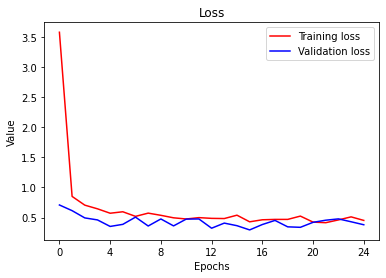

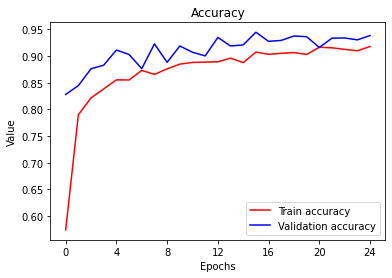

In [56]:

%cd /content

title=['Loss','Accuracy']
parameter={0:['loss','val_loss'],1:['accuracy','val_accuracy']}
labels={0:['Training loss','Validation loss'],1:['Train accuracy','Validation accuracy']}
for i in range(2): 
  plt.plot(np.arange(epochs),train_history.history[parameter.get(i)[0]],color='red',label=labels.get(i)[0])
  plt.plot(np.arange(epochs),train_history.history[parameter.get(i)[1]],color='blue',label=labels.get(i)[1])
  plt.title(title[i])
  plt.xticks(np.arange(0,epochs,4))
  plt.xlabel('Epochs')
  plt.ylabel('Value')
  plt.legend()
  plt.savefig("{}.png".format(title[i]))
  plt.show()

plt.show()


In [59]:
%cd /content/data

/content/data


In [60]:
test_data = pd.read_csv('Test.csv')

In [61]:
image_test = []
test_label = []
for i in range(test_data.shape[0]):
  temp_image = Image.open(test_data.iloc[i]["Path"]).convert("RGB")
  temp_image = temp_image.resize((size,size))
  temp_array = np.array(temp_image)
  image_test.append(temp_array)
  test_label.append(test_data.iloc[i]["ClassId"])

In [62]:
x_test=np.array(image_test)
labels_predict_for_test=np.argmax(model.predict(x_test),axis=1)

In [63]:
from sklearn.metrics import accuracy_score
print("Accuracy for Test:",accuracy_score(labels_predict_for_test,test_label))

Accuracy for Test: 0.8448931116389549


In [64]:

%cd /content

/content


In [65]:

model.save('CNN.h5')